# Import modules + define routines & EPICS channels

In [7]:
%matplotlib nbagg
import numpy as np
import json
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from scipy.optimize import curve_fit
import os

In [8]:
def LoadData_knife_edge(filename):
    with h5py.File(filename, 'r') as BS_file:
        pulse_ids = BS_file[channel_pulse_ids][:]
        reprate_FEL = ((pulse_ids%4 == 0) & (pulse_ids%8 != 0))                #This is for 25 Hz
        reprate_laser = pulse_ids%8 == 0                                       #This is for 12.5 Hz
        
        Data_pumped = BS_file[channel_PIPS_fluo][:][reprate_laser]
        Data_unpumped = BS_file[channel_PIPS_fluo][:][reprate_FEL]
        
        DataT_pumped = BS_file[channel_PIPS_trans][:][reprate_laser]
        DataT_unpumped = BS_file[channel_PIPS_trans][:][reprate_FEL]
        
        Izero_pump = BS_file[channel_Izero][:][reprate_laser]
        Izero_unpump = BS_file[channel_Izero][:][reprate_FEL]
        
        #Energy = BS_file[channel_energy][:][reprate_FEL]
        Position = BS_file[channel_position][:][reprate_FEL]
        Energy = BS_file[channel_waveplate][:][reprate_FEL]
        #Position = BS_file[channel_laser_pitch][:][reprate_FEL]
        Palm = BS_file[channel_palm_analysis][:][reprate_FEL]
        
    return Data_pumped, Data_unpumped, Izero_pump, Izero_unpump, Energy, Position, DataT_pumped, DataT_unpumped, Palm

def errfunc(x, a, b, c, d):
    return a + b*erf((c-x)*np.sqrt(np.log(2))/(np.abs(d)))

def biexp(x, baseline, amplitude, t0, width, a1, t1, a2, t2):
    return baseline + amplitude*(1-erf((t0-x)*np.sqrt(np.log(2))/(np.abs(width))))*(a1*np.exp(-x/t1)+a2*np.exp(-x/t2))

In [9]:
# only through raw and JF

channel_PIPS_trans = "data/SARES11-GES1:CH1_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_PIPS_fluo = "data/SARES11-GES1:CH2_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_Izero = "data/SARES11-LSCP10-FNS:CH2:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
channel_Izero2 = "data/SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
channel_Izero3 = "data/SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
channel_Izero4 = "data/SARES11-LSCP10-FNS:CH2:VAL_GET/data"         #Izero diode to PRIME Ioxos (channel 2)
channel_LaserDiode = "data/SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
channel_Laser_refDiode = "data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"  #Laser diode leaking from beampath, to ESA Laser Ioxos 
#channel_LaserDiode = "SARES11-GES1:CH2_VAL_GET/data"          #Laser diode to PRIME Keysight
channel_pulse_ids = "data/SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
channel_delay = "data/SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
channel_LAM_delaystage = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM internal stage position in mm
channel_LAM_stepper = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS/data"         #LAM stepper motor (used for feedback)
channel_waveplate= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV8_NBS/data"         #LAM stepper motor (used for feedback)
channel_PALM_eTOF = "data/SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2

#Position of the stage: Dummy PV1 for x axis, dummy PV3 for y axis
channel_position = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV1_NBS/data"     #Huber stage X position. 
channel_position = "data/SLAAR11-LMOT-M451:ENC_1_BS/data"
channel_energy = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"       #Energy from the monochromator
channel_laser_yaw= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"
channel_laser_pitch= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS/data"
channel_palm_analysis= "data/SAROP11-PALMK118:ANALYSIS_PALM_DEL/data"     # Palm analysis probably fs ????


In [7]:
# #For BS local

# channel_PIPS_trans = "SARES11-GES1:CH1_VAL_GET/data"           #X-ray diode to PRIME Keysight
# channel_PIPS_fluo = "SARES11-GES1:CH2_VAL_GET/data"           #X-ray diode to PRIME Keysight
# channel_Izero = "SARES11-LSCP10-FNS:CH2:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
# channel_Izero2 = "SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
# channel_Izero3 = "SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
# channel_Izero4 = "SARES11-LSCP10-FNS:CH2:VAL_GET/data"         #Izero diode to PRIME Ioxos (channel 2)
# channel_LaserDiode = "SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
# channel_Laser_refDiode = "SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"  #Laser diode leaking from beampath, to ESA Laser Ioxos 
# #channel_LaserDiode = "SARES11-GES1:CH2_VAL_GET/data"          #Laser diode to PRIME Keysight
# channel_pulse_ids = "SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
# channel_delay = "SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
# channel_LAM_delaystage = "SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM internal stage position in mm
# channel_LAM_stepper = "SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS/data"         #LAM stepper motor (used for feedback)
# channel_waveplate= "SLAAR11-LTIM01-EVR0:DUMMY_PV8_NBS/data"         #LAM stepper motor (used for feedback)
# channel_PALM_eTOF = "SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2

# #Position of the stage: Dummy PV1 for x axis, dummy PV3 for y axis
# channel_position = "SLAAR11-LTIM01-EVR0:DUMMY_PV1_NBS/data"     #Huber stage X position. 
# channel_position = "SLAAR11-LMOT-M451:ENC_1_BS/data"
# channel_energy = "SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"       #Energy from the monochromator
# channel_laser_yaw= "SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"
# channel_laser_pitch= "SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS/data"
# channel_palm_analysis= "data/SAROP11-PALMK118:ANALYSIS_PALM_DEL/data"     # Palm analysis probably fs ????


# Scan name

In [16]:
scan_name ="Febpy_fluence_350nm_7112eV_1ps_003"
#scan_name ="CytC_Fe3_monoscan_288nm_5uJ_7000fs_007"

# file names of the type below. copy paste for ease:
# FEL_knife_edge_Y_coarse_
# FEL_knife_edge_X_coarse_
# FEL_knife_edge_Y_fine_
# FEL_knife_edge_X_fine_

DIR = "/sf/alvra/data/p17803/raw/scan_data/" + scan_name + "/"
DIR_json = "/sf/alvra/data/p17803/res/scan_info/"

# Load one step and filter some data from I0

In [18]:
 f = "Febpy_fluence_350nm_7112eV_1ps_003_step0000.BSREAD.h5"
#f = "CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0005.BSREAD.h5"
filename = DIR + f

(signal_pump_loop,signal_unpump_loop,Izero_pump_loop, Izero_unpump_loop,energy_loop,position_loop,\
         signalT_pump_loop,signalT_unpump_loop, palm_loop) = LoadData_knife_edge(filename)

Izero_pump_original = Izero_pump_loop.copy()
signal_pump_original = signal_pump_loop.copy() 
#Izero_pump_loop = [x for x in Izero_pump_loop if (np.abs(x) > 1000)]
print (np.median(Izero_pump_loop)-1.25*(np.std(Izero_pump_loop)))
conditionPumpMax = Izero_pump_loop < np.median(Izero_pump_loop)+2.5*(np.std(Izero_pump_loop))
conditionPumpMin = Izero_pump_loop > np.median(Izero_pump_loop)-2*(np.std(Izero_pump_loop))

conditionUnPumpMax = Izero_unpump_loop < np.median(Izero_unpump_loop)+2.5*(np.std(Izero_unpump_loop))
conditionUnPumpMin = Izero_unpump_loop > np.median(Izero_unpump_loop)-2.*(np.std(Izero_unpump_loop))

conditionGeneral = Izero_pump_loop > 1000
conditionGeneral2 = Izero_unpump_loop > 1000

Izero_pump_loop = Izero_pump_loop[conditionPumpMin & conditionPumpMax & conditionUnPumpMin & conditionUnPumpMax & conditionGeneral & conditionGeneral2]
signal_pump_loop = signal_pump_loop[conditionPumpMin & conditionPumpMax & conditionUnPumpMin & conditionUnPumpMax & conditionGeneral & conditionGeneral2]
#Izero_pump_loop = [x for x in Izero_unpump_loop if (np.abs(x) > 1000)]

Izero_pump_loop = np.asarray(Izero_pump_loop)
Izero_pump_original = np.asarray(Izero_pump_original)

2406.240093284676


<IPython.core.display.Javascript object>


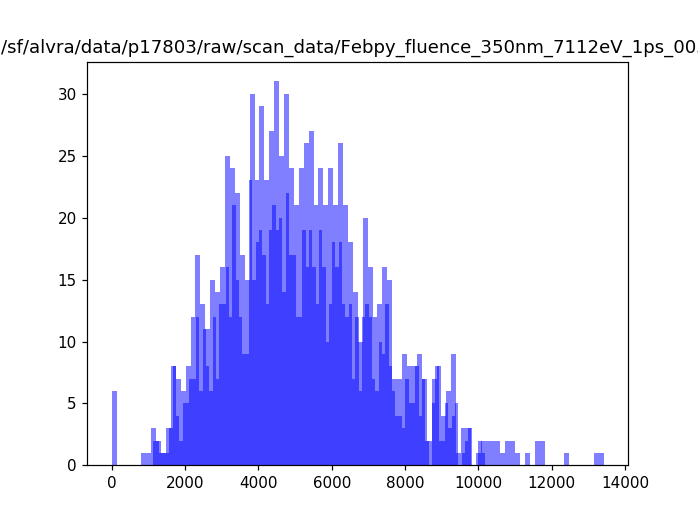

In [19]:
num_bins = 100
plt.figure()
plt.hist(Izero_pump_original, num_bins, facecolor='blue', alpha=0.5)
plt.hist(Izero_pump_loop, num_bins, facecolor='blue', alpha=0.5)
plt.title(DIR)


plt.show()

<IPython.core.display.Javascript object>


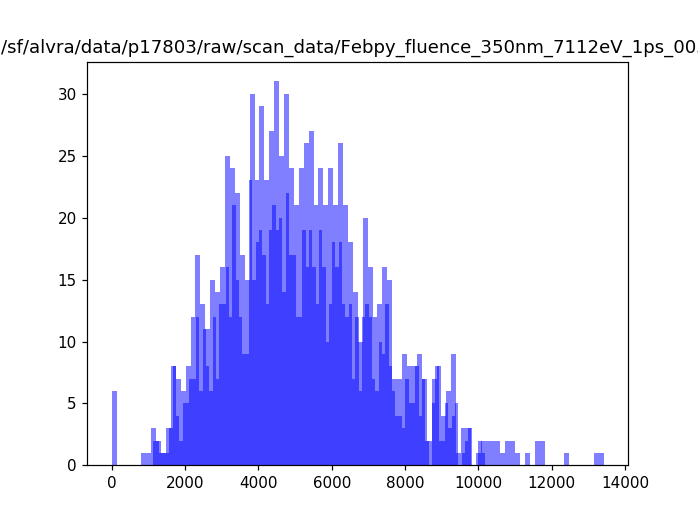

In [20]:
num_bins = 100
plt.figure()
plt.hist(Izero_pump_loop, num_bins, facecolor='blue', alpha=0.5)
plt.hist(Izero_pump_original, num_bins, facecolor='blue', alpha=0.5)
plt.title(DIR)


plt.show()

952 1000


<IPython.core.display.Javascript object>


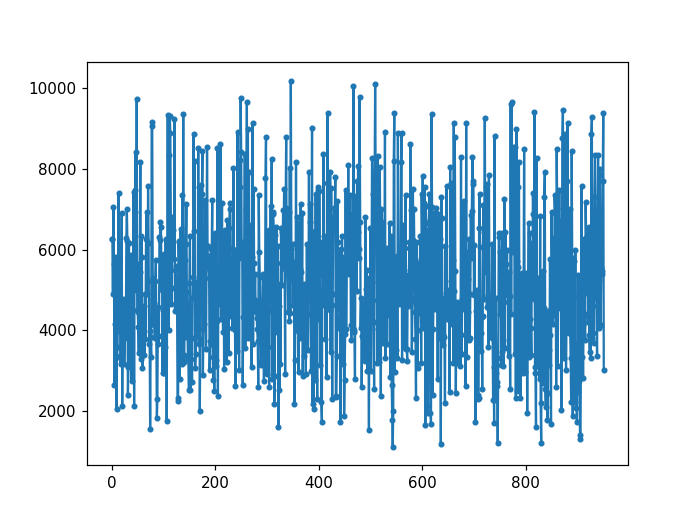

In [23]:
print (Izero_pump_loop.size, Izero_pump_original.size)
plt.figure()

#plt.plot(Izero_pump_original, label="original",marker='.')
plt.plot(Izero_pump_loop, label="Izero_pump",marker='.')

# Analyse full run

In [24]:
!ls -lah -rt $DIR
!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 129G
-rw-r--r--.   1 root p17803  18G Jan 31 15:15 Febpy_fluence_350nm_7112eV_1ps_003_step0000.JF02T09V01.h5
-rw-r--r--.   1 root p17803 6.2M Jan 31 15:15 Febpy_fluence_350nm_7112eV_1ps_003_step0000.BSREAD_CA.h5
-rw-r--r--.   1 root p17803  18G Jan 31 15:17 Febpy_fluence_350nm_7112eV_1ps_003_step0001.JF02T09V01.h5
-rw-r--r--.   1 root p17803 827M Jan 31 15:17 Febpy_fluence_350nm_7112eV_1ps_003_step0000.BSREAD.h5
-rw-r--r--.   1 root p17803 6.2M Jan 31 15:17 Febpy_fluence_350nm_7112eV_1ps_003_step0001.BSREAD_CA.h5
-rw-r--r--.   1 root p17803  18G Jan 31 15:18 Febpy_fluence_350nm_7112eV_1ps_003_step0002.JF02T09V01.h5
-rw-r--r--.   1 root p17803 827M Jan 31 15:18 Febpy_fluence_350nm_7112eV_1ps_003_step0001.BSREAD.h5
-rw-r--r--.   1 root p17803 6.2M Jan 31 15:18 Febpy_fluence_350nm_7112eV_1ps_003_step0002.BSREAD_CA.h5
-rw-r--r--.   1 root p17803  18G Jan 31 15:20 Febpy_fluence_350nm_7112eV_1ps_003_step0003.JF02T09V01.h5
-rw-r--r--.   1 root p17803 827M Jan 31 15:20 Febpy_fluence_350n

In [25]:
json_file = DIR_json + scan_name + "_scan_info.json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 1

print ("Processing",numFiles,"files")

Signal_pump = []
Signal_unpump = []
Signal_diff = []
err_signal_pump = []
err_signal_unpump = []
err_signal_diff = []

#SignalT_pump = []
#SignalT_unpump = []
#err_signalT_pump = []

#Izero_pump = []
#Izero_unpump = []
#err_Izero = []
#Izero_loop = []

Position_mm = []
Energy_eV = []

Palm_fs = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])    
    exists = os.path.isfile(filename)
    if exists: #and i!=5:
        print("step",i+1,"of",numFiles,": Processing %s" % (str(data['scan_files'][i][0])))
        (signal_pump_loop,signal_unpump_loop,Izero_pump_loop, Izero_unpump_loop,energy_loop,position_loop,\
         signalT_pump_loop,signalT_unpump_loop, palm_loop) = LoadData_knife_edge(str(data['scan_files'][i][0]))
        
        threshold_pump = Izero_pump_loop > 1000
        threshold_unpump = Izero_unpump_loop > 1000 
        condition_pumpMin = Izero_pump_loop > (np.median(Izero_pump_loop) - 1.2*(np.std(Izero_pump_loop)))
        condition_pumpMax = Izero_pump_loop < (np.median(Izero_pump_loop) + 3.5*(np.std(Izero_pump_loop)))
        
        condition_unpumpMin = Izero_unpump_loop > (np.median(Izero_unpump_loop) - 1.2*(np.std(Izero_unpump_loop)))
        condition_unpumpMax = Izero_unpump_loop < (np.median(Izero_unpump_loop) + 3.5*(np.std(Izero_unpump_loop)))

        signal_pump_loop = signal_pump_loop[condition_pumpMin & condition_pumpMax & condition_unpumpMin & \
         condition_unpumpMax & threshold_pump & threshold_unpump]
        Izero_pump_loop = Izero_pump_loop[condition_pumpMin & condition_pumpMax & condition_unpumpMin & \
         condition_unpumpMax & threshold_pump & threshold_unpump]
        
        signal_unpump_loop = signal_unpump_loop[condition_pumpMin & condition_pumpMax & condition_unpumpMin & \
         condition_unpumpMax & threshold_pump & threshold_unpump]
        Izero_unpump_loop = Izero_unpump_loop[condition_pumpMin & condition_pumpMax & condition_unpumpMin & \
         condition_unpumpMax & threshold_pump & threshold_unpump]
        
        signal_pump_loop_norm = signal_pump_loop / Izero_pump_loop
        signal_unpump_loop_norm = signal_unpump_loop / Izero_unpump_loop
        signal_diff_loop = signal_pump_loop_norm - signal_unpump_loop_norm
        
        Signal_pump.append(signal_pump_loop_norm.mean())
        Signal_unpump.append(signal_unpump_loop_norm.mean())
        Signal_diff.append(signal_diff_loop.mean())
        
        err_signal_pump.append(signal_pump_loop_norm.std()/np.sqrt(signal_pump_loop_norm.size))
        err_signal_unpump.append(signal_unpump_loop_norm.std()/np.sqrt(signal_unpump_loop_norm.size))
        err_signal_diff.append(signal_diff_loop.std()/np.sqrt(signal_diff_loop.size))
        
        #SignalT_pump.append(np.mean(signalT_pump_loop))
        #SignalT_unpump.append(signalT_unpump_loop.mean())
        #err_signalT_pump.append(signalT_pump_loop.std()/np.sqrt(signalT_pump_loop.size))
        
        energy_loop = [x for x in energy_loop if (np.abs(x) > 0)]
        Energy_eV.append(np.mean(energy_loop))
        Position_mm.append(np.mean(position_loop))
        Palm_fs.append(np.mean(palm_loop))
        
        print (signal_pump_loop.size,signal_unpump_loop.size,np.mean(position_loop))
    
Signal_pump = np.asarray(Signal_pump)
Signal_unpump = np.asarray(Signal_unpump)
Signal_diff = np.asarray(Signal_diff)

err_signal_pump = np.asarray(err_signal_pump)
err_signal_unpump = np.asarray(err_signal_unpump)
err_signal_diff = np.asarray(err_signal_diff)

#err_signal_pump_relative = np.asarray(err_signal_pump)/Signal_pump
#err_signal_unpump_relative = np.asarray(err_signal_unpump)/Signal_unpump

#SignalT_pump = np.asarray(SignalT_pump)
#SignalT_unpump = np.asarray(SignalT_unpump)
#err_signalT_pump = np.asarray(err_signalT_pump)

#Izero_pump = np.asarray(Izero_pump)
#Izero_unpump = np.asarray(Izero_unpump)
#err_Izero = np.asarray(err_Izero)

Energy_eV = np.asarray(Energy_eV)
Position_mm = np.asarray(Position_mm)
Palm_fs =np.asarray(Palm_fs)
Delay_ps = (Position_mm - 150.365)*2/(3e8*1e3*1e-12) # change to right t0 !
print ("Job done!")

/sf/alvra/data/p17803/res/scan_info/Febpy_fluence_350nm_7112eV_1ps_003_scan_info.json
Processing 7 files
step 1 of 7 : Processing /sf/alvra/data/p17803/raw/scan_data/Febpy_fluence_350nm_7112eV_1ps_003/Febpy_fluence_350nm_7112eV_1ps_003_step0000.BSREAD.h5
866 866 149.54719795430398
step 2 of 7 : Processing /sf/alvra/data/p17803/raw/scan_data/Febpy_fluence_350nm_7112eV_1ps_003/Febpy_fluence_350nm_7112eV_1ps_003_step0001.BSREAD.h5
873 873 149.54720435389436
step 3 of 7 : Processing /sf/alvra/data/p17803/raw/scan_data/Febpy_fluence_350nm_7112eV_1ps_003/Febpy_fluence_350nm_7112eV_1ps_003_step0002.BSREAD.h5
828 828 149.5471958544384
step 4 of 7 : Processing /sf/alvra/data/p17803/raw/scan_data/Febpy_fluence_350nm_7112eV_1ps_003/Febpy_fluence_350nm_7112eV_1ps_003_step0003.BSREAD.h5
844 844 149.5471962544128
step 5 of 7 : Processing /sf/alvra/data/p17803/raw/scan_data/Febpy_fluence_350nm_7112eV_1ps_003/Febpy_fluence_350nm_7112eV_1ps_003_step0004.BSREAD.h5
858 858 149.54720135408638
step 6 of 7 

<IPython.core.display.Javascript object>


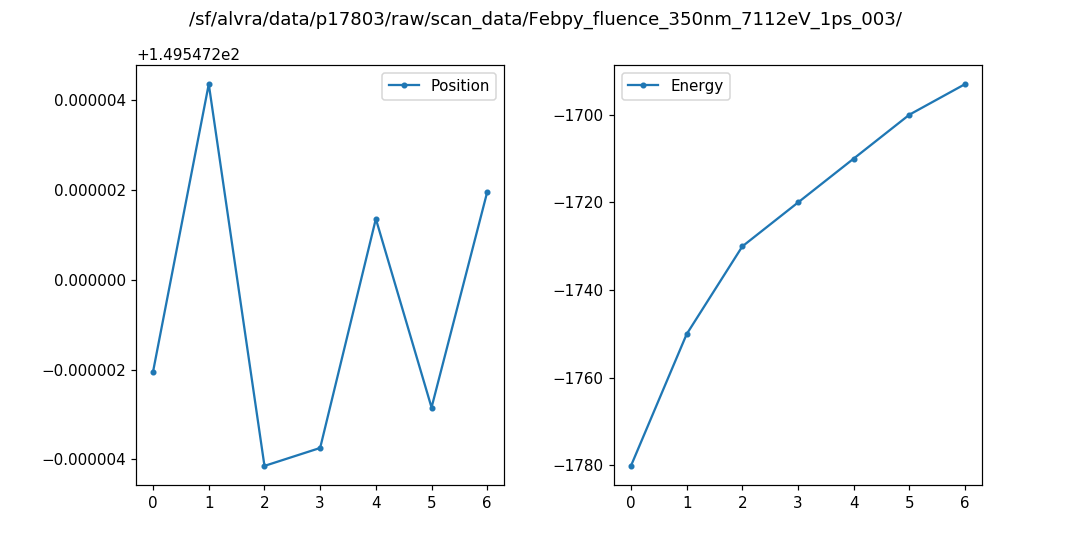

In [26]:
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1e5
#plt.title(DIR,horizontalalignment='right')

plt.subplot(1,2,1)
plt.plot(Position_mm, label="Position",marker='.')
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot(Energy_eV, label="Energy",marker='.')
plt.legend(loc="best")

plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 

plt.show()

1.920173573761329
(857,)


<IPython.core.display.Javascript object>


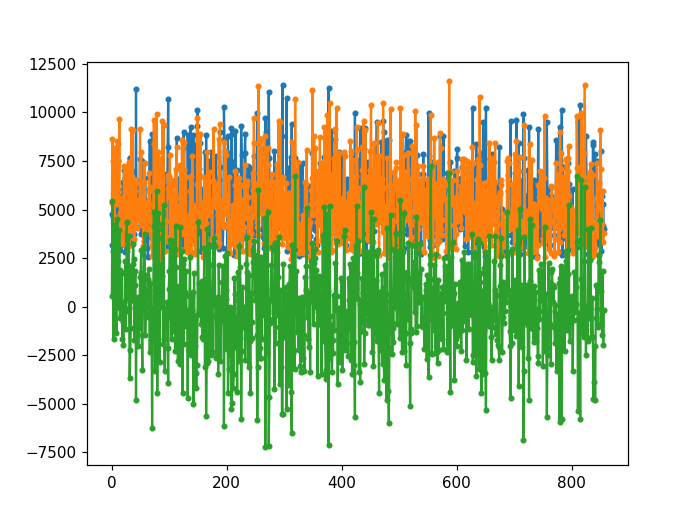

57.08891250851957


In [27]:
print (signal_pump_loop.mean())
print (signal_unpump_loop.shape)
plt.figure()

plt.plot(Izero_pump_loop, label="FEL+Laser",marker='.')
plt.plot(Izero_unpump_loop, label="FEL+Laser",marker='.')
plt.plot(Izero_unpump_loop-Izero_pump_loop, label="FEL+Laser",marker='.')

print (Izero_pump_loop.mean()- Izero_unpump_loop.mean())

In [28]:
low_err_pump= Signal_pump - err_signal_pump
high_err_pump= Signal_pump + err_signal_pump
low_err_unpump= Signal_unpump - err_signal_unpump
high_err_unpump= Signal_unpump + err_signal_unpump

low_err_diff= Signal_diff - err_signal_diff
high_err_diff= Signal_diff + err_signal_diff

In [17]:
# Optional to run --> it returns the maximum value of the trace
#m=max(Signal_pump_norm-Signal_unpump_norm)
#print(m)
#[i for i, j in enumerate(Signal_pump_norm-Signal_unpump_norm) if j==m] # returns the location in x axis indexes of the max
#print(Energy_eV[15])
#print(Position_mm)

# Plot Energy Scans

<IPython.core.display.Javascript object>


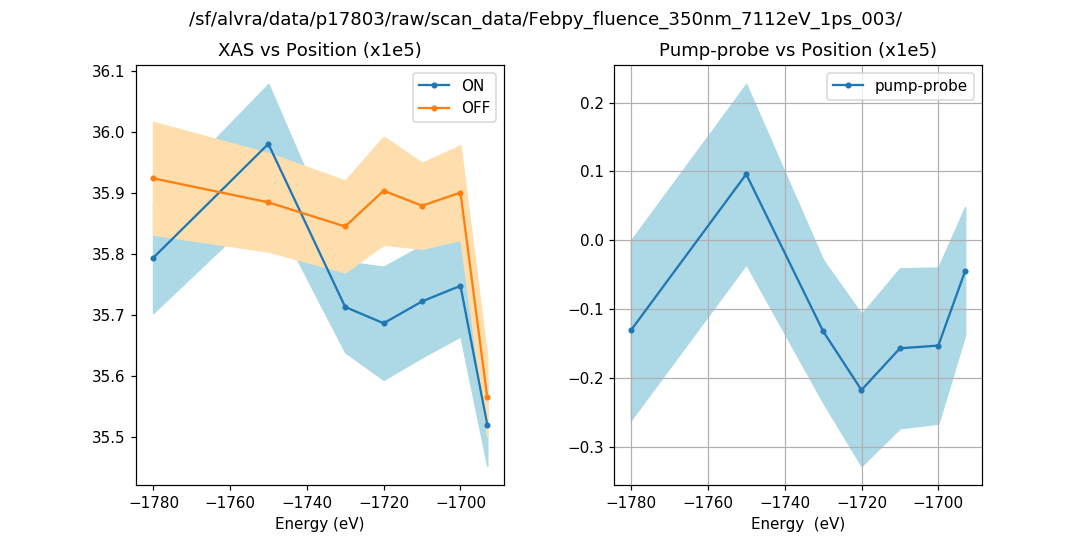

<IPython.core.display.Javascript object>


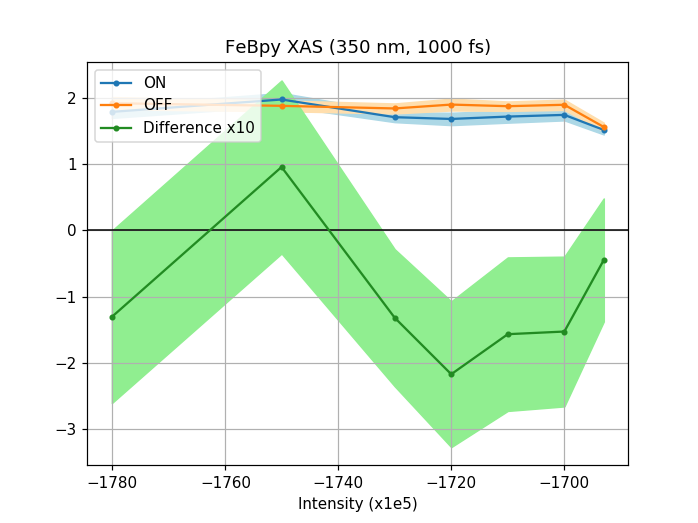

In [29]:
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1e5
#plt.title(DIR,horizontalalignment='right')

plt.subplot(1,2,1)
plt.plot(Energy_eV, scale*Signal_pump, label="ON",marker='.')
plt.plot(Energy_eV, scale*Signal_unpump, label="OFF",marker='.')
plt.fill_between(Energy_eV, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Energy_eV, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Energy (eV)")
plt.gca().set_title('XAS vs Position (x1e5)')
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot(Energy_eV, scale*(Signal_diff), label="pump-probe",marker='.')
plt.fill_between(Energy_eV, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Energy  (eV)")
plt.gca().set_title('Pump-probe vs Position (x1e5)')
plt.legend(loc="best")
#plt.plot(Position_mm, [-0.00000005]*len(Energy_eV) , label="OFF")

#plt.xlabel("Energy (eV)")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 

plt.show()

plt.figure()
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
plt.plot(Energy_eV, scale*Signal_pump-34.0, label="ON",marker='.')
plt.plot(Energy_eV, scale*Signal_unpump-34.0, label="OFF",marker='.')
plt.fill_between(Energy_eV, scale*low_err_pump-34.0, scale*high_err_pump-34.0, color='lightblue')
plt.fill_between(Energy_eV, scale*low_err_unpump-34.0, scale*high_err_unpump-34.0, color='navajowhite')
plt.xlabel("Energy (eV)")
plt.xlabel("Intensity (x1e5)")
plt.gca().set_title('FeBpy XAS (350 nm, 1000 fs)')
plt.legend(loc="best")
plt.plot(Energy_eV, 10*scale*(Signal_pump-Signal_unpump), label="Difference x10", color='forestgreen',marker='.')
plt.fill_between(Energy_eV, 10*scale*low_err_diff, 10*scale*high_err_diff, color='lightgreen')
plt.legend(loc='upper left')
plt.grid()


#plt.savefig('Timescan_7_diode')

# Plot Time Scans

<IPython.core.display.Javascript object>


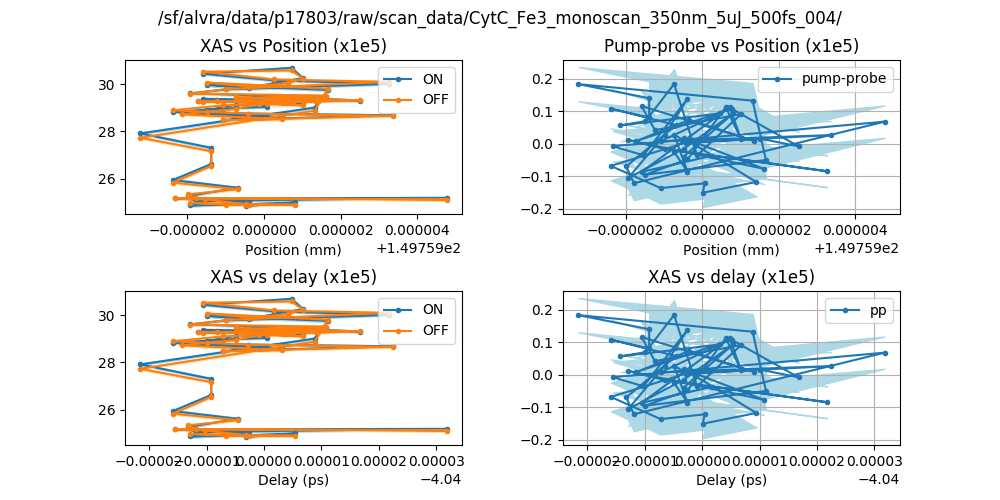

In [19]:
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1e5

plt.subplot(2,2,1)
plt.plot(Position_mm, scale*Signal_pump, label="ON",marker='.')
plt.plot(Position_mm, scale*Signal_unpump, label="OFF",marker='.')
plt.fill_between(Position_mm, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Position_mm, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Position (mm)")
plt.gca().set_title('XAS vs Position (x1e5)')
plt.legend(loc="best")

plt.subplot(2,2,2)
plt.plot(Position_mm, scale*(Signal_diff), label="pump-probe",marker='.')
plt.fill_between(Position_mm, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Position (mm)")
plt.gca().set_title('Pump-probe vs Position (x1e5)')
plt.legend(loc="best")
#plt.plot(Position_mm, [-0.00000005]*len(Energy_eV) , label="OFF")

plt.subplot(2,2,3)
plt.plot(Delay_ps, scale*Signal_pump, label="ON",marker='.')
plt.plot(Delay_ps, scale*Signal_unpump, label="OFF",marker='.')
plt.fill_between(Delay_ps, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Delay_ps, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Delay (ps)")
plt.gca().set_title('XAS vs delay (x1e5)')
plt.legend(loc="best")

plt.subplot(2,2,4)
plt.plot(Delay_ps, scale*(Signal_diff), label="pp",marker='.')
plt.fill_between(Delay_ps, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Delay (ps)")
plt.gca().set_title('XAS vs delay (x1e5)')


#plt.xlabel("Energy (eV)")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 
plt.show()

# save the pp sig and its xaxis into a variable name after the scan name. 
# This is convenient to compare different scans together, see cell below.
x = scan_name + "_DIFF"
t = scan_name + "_DELAY"
vars()[x] = (Signal_diff)
vars()[t] = Delay_ps

#plt.savefig('Timescan_7_diode')


In [137]:
# Now fit with error funciton (defined above)
Signal_norm = Signal_pump_norm-Signal_unpump_norm
parameters,extras = curve_fit(errfunc, Position_mm, Signal_norm, p0 = [0, 0.1, 150.39, 0.05]) # [baseline, step amplitude, center, FWHM]

print("Position t0 =",np.abs(np.round(parameters[2],3)),"mm")
print("Width =",np.abs(np.round(parameters[3],3)),"mm")

Position t0 = 150.39 mm
Width = 0.005 mm


<IPython.core.display.Javascript object>


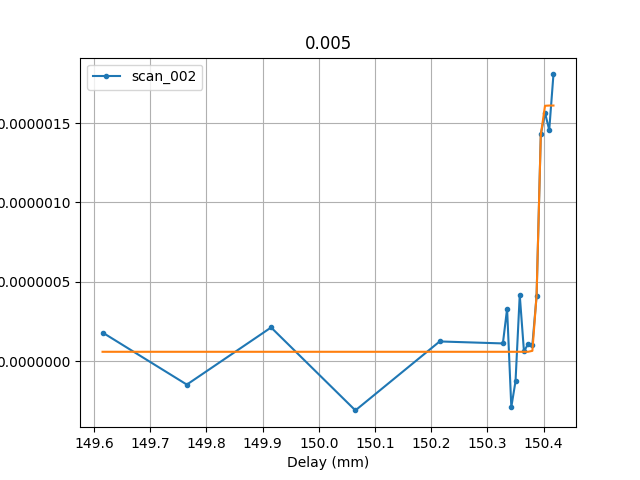

In [139]:
#... and the plot with the fit curve

#savedir = "/das/work/p17/p17569/Beamline/"

plt.figure()

plt.plot(Position_mm, Signal_norm, label="scan_002",marker='.')
plt.plot(Position_mm, errfunc(Position_mm,*parameters))

#low_err= Signal_norm - err_signal_norm
#high_err= Signal_norm + err_signal_norm
#plt.fill_between(Position_mm, low_err, high_err, color='lightblue')

plt.title(np.round(parameters[3], 3) )
plt.grid()
plt.xlabel("Delay (mm)")
plt.legend(loc="best")
plt.show()
#plt.savefig(savedir + 'scan_LAM_003')

# Compare runs

In [50]:
# you have to run the analysis once and the data will be saved in variables scan_name_DELAY and scan_name_DIFF

xaxis1=CytC_Fe3_timescan_5uJ_288nm_7122eV_003_DELAY
yaxis1=CytC_Fe3_timescan_5uJ_288nm_7122eV_003_DIFF

xaxis2=CytC_Fe3_timescan_5uJ_288nm_7122eV_004_DELAY
yaxis2=CytC_Fe3_timescan_5uJ_288nm_7122eV_004_DIFF

xaxis3=CytC_Fe3_timescan_5uJ_288nm_7122eV_005_DELAY
yaxis3=CytC_Fe3_timescan_5uJ_288nm_7122eV_005_DIFF

xaxis4=CytC_Fe3_timescan_5uJ_288nm_7122eV_006_DELAY
yaxis4=CytC_Fe3_timescan_5uJ_288nm_7122eV_006_DIFF

xaxis2SORTED = sorted(xaxis2)
sortindices2=np.argsort(xaxis2)
yaxis2original=yaxis2
yaxis2=yaxis2[sortindices2]
#yaxisMODEL = biexp(x,-0.05, 0.1, 0, 0.5, 1, 2., 1, 10.)

plt.figure()
plt.plot(xaxis1, scale*yaxis1, label="pp",marker='.')
plt.plot(xaxis2, scale*yaxis2, label="pp",marker='.')
plt.plot(xaxis3, scale*yaxis3, label="pp",marker='.')
plt.plot(xaxis4, scale*yaxis4, label="pp",marker='.')
plt.grid()
plt.xlabel("Delay (ps)")
plt.gca().set_title('XAS vs delay (x1e5)')
plt.show()

NameError: name 'CytC_Fe3_timescan_5uJ_288nm_7122eV_003_DELAY' is not defined

Parameters for scan: CytC_Fe3_timescan_5uJ_288nm_7122eV_003
Position t0 = 0.714 ps
Width = 0.185 ps
a1 = 0.008
t1 = 0.119 ps
a2 = 1.777
t2 = 5.388 ps
Parameters for scan: CytC_Fe3_timescan_5uJ_288nm_7122eV_004
Position t0 = 0.081 ps
Width = 0.318 ps
a1 = 0.404
t1 = 0.127 ps
a2 = 0.722
t2 = 11.753 ps
Parameters for scan: CytC_Fe3_timescan_5uJ_288nm_7122eV_005
Position t0 = 0.027 ps
Width = 0.2 ps
a1 = 2.294
t1 = 0.942 ps
a2 = 0.672
t2 = 10.968 ps


<IPython.core.display.Javascript object>


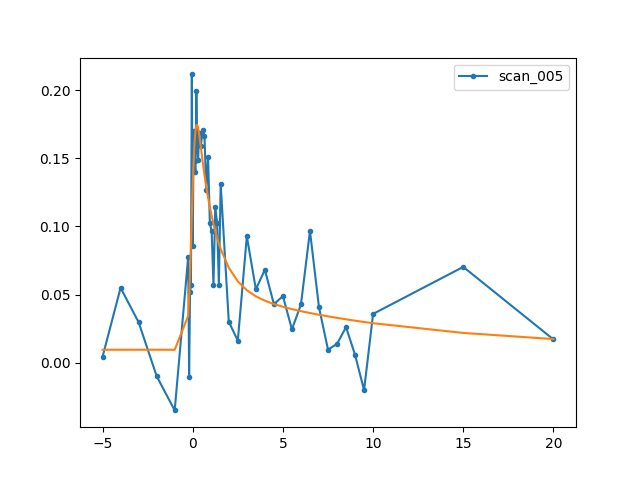

<IPython.core.display.Javascript object>


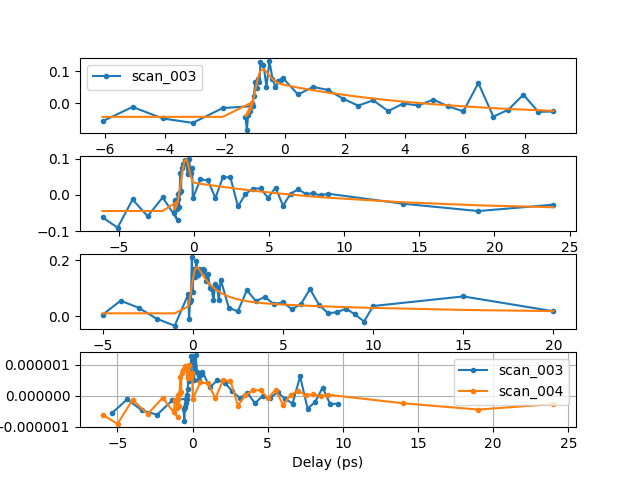

In [121]:
# Fit of the time traces
parameters1,extras = curve_fit(biexp, xaxis1, scale*yaxis1, p0 = [-0.05, 0.1, 0, 0.5, 1, 1., 1., 5.]) # [baseline, step amplitude, center, FWHM]
parameters2,extras = curve_fit(biexp, xaxis2, scale*yaxis2, p0 = [-0.05, 0.1, 0, 0.5, 1, 1., 1., 5.]) # [baseline, step amplitude, center, FWHM]
parameters3,extras = curve_fit(biexp, xaxis3, scale*yaxis3, p0 = [-0.0, 0.2, 0, 0.1, 1, 1., 1., 5.]) # [baseline, step amplitude, center, FWHM]

print("Parameters for scan: CytC_Fe3_timescan_5uJ_288nm_7122eV_003")
print("Position t0 =",np.abs(np.round(parameters1[2],3)),"ps")
print("Width =",np.abs(np.round(parameters1[3],3)),"ps")
print("a1 =",np.abs(np.round(parameters1[4],3)))
print("t1 =",np.abs(np.round(parameters1[5],3)),"ps")
print("a2 =",np.abs(np.round(parameters1[6],3)))
print("t2 =",np.abs(np.round(parameters1[7],3)),"ps")

print("Parameters for scan: CytC_Fe3_timescan_5uJ_288nm_7122eV_004")
print("Position t0 =",np.abs(np.round(parameters2[2],3)),"ps")
print("Width =",np.abs(np.round(parameters2[3],3)),"ps")
print("a1 =",np.abs(np.round(parameters2[4],3)))
print("t1 =",np.abs(np.round(parameters2[5],3)),"ps")
print("a2 =",np.abs(np.round(parameters2[6],3)))
print("t2 =",np.abs(np.round(parameters2[7],3)),"ps")

print("Parameters for scan: CytC_Fe3_timescan_5uJ_288nm_7122eV_005")
print("Position t0 =",np.abs(np.round(parameters3[2],3)),"ps")
print("Width =",np.abs(np.round(parameters3[3],3)),"ps")
print("a1 =",np.abs(np.round(parameters3[4],3)))
print("t1 =",np.abs(np.round(parameters3[5],3)),"ps")
print("a2 =",np.abs(np.round(parameters3[6],3)))
print("t2 =",np.abs(np.round(parameters3[7],3)),"ps")

plt.figure()
plt.plot(xaxis3, scale*yaxis3, label="scan_005",marker='.')
plt.plot(xaxis3, biexp(xaxis3,parameters3[0],parameters3[1],parameters3[2],parameters3[3],parameters3[4],\
                       parameters3[5],parameters3[6],parameters3[7]))
plt.legend(loc="best")


plt.figure()
plt.subplot(4,1,1)
plt.plot(xaxis1, scale*yaxis1, label="scan_003",marker='.')
plt.plot(xaxis1, biexp(xaxis1,parameters1[0],parameters1[1],parameters1[2],parameters1[3],parameters1[4],\
                       parameters1[5],parameters1[6],parameters1[7]))
plt.legend(loc="best")

plt.subplot(4,1,2)
plt.plot(xaxis2, scale*yaxis2, label="scan_004",marker='.')
plt.plot(xaxis2, biexp(xaxis2,parameters2[0],parameters2[1],parameters2[2],parameters2[3],parameters2[4],\
                       parameters2[5],parameters2[6],parameters2[7]))

plt.subplot(4,1,3)
plt.plot(xaxis3, scale*yaxis3, label="scan_005",marker='.')
plt.plot(xaxis3, biexp(xaxis3,parameters3[0],parameters3[1],parameters3[2],parameters3[3],parameters3[4],\
                       parameters3[5],parameters3[6],parameters3[7]))
#plt.plot(xaxis1 - parameters1[2], biexp(xaxis1 - parameters1[2],parameters1[0],parameters1[1],\
#                 parameters1[2],parameters1[3],parameters1[4],parameters1[5],parameters1[6],parameters1[7]))
#plt.plot(xaxis2 - parameters2[2], biexp(xaxis2 - parameters2[2],parameters2[0],parameters2[1],parameters2[2],\
#                 parameters2[3],parameters2[4],parameters2[5],parameters2[6],parameters2[7]))

plt.subplot(4,1,4)
#plt.plot(xaxis4, scale*yaxis4, label="scan_006",marker='.')
#plt.plot(xaxis4, biexp(xaxis4,parameters4[0],parameters4[1],parameters4[2],parameters4[3],parameters4[4],\
#                       parameters4[5],parameters4[6],parameters4[7]))
plt.plot(xaxis1 - parameters1[2], yaxis1, label="scan_003",marker='.')
plt.plot(xaxis2 - parameters2[2], yaxis2, label="scan_004",marker='.')
plt.grid()
plt.xlabel("Delay (ps)")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.5,hspace = 0.3) 
plt.show()


# More stuff

In [18]:
myList = np.concatenate((np.arange(7100,7105,1), np.arange(7105,7120,0.5), np.arange(7120,7160,1),np.arange(7160,7200,3)))

In [560]:
time_zero = 150.188         #this is in mm from the delay scans

desidered_delays = [-10,-1,1]  
#choose this in ps

delay_to_set = (100/(2*333))*desidered_delay + time_zero        #factor of 2 because of the delay stage

desidered_delay + time_zero
print ("To be at",desidered_delay,"ps, put the laser pump delay stage to",np.round(delay_to_set,4),"mm")


T_1 = np.arange(149.4372,150.1872


mtime = np.concatenate((np.arange(149.4372,7105,1), np.arange(7105,7120,0.5), np.arange(7120,7160,1),np.arange(7160,7200,3)))

In [561]:
print(time_zero)

150.295


In [ ]:
desidered_delays = [-10,-1,1]  


In [85]:
Position_mm

delay_ps = (Position_mm - 150.188)*2/(3e8*1e3*1e-12)
print(delay_ps)

[-5.00533552 -4.00533186 -3.00532519 -2.00533486 -1.00534287 -0.24999255
 -0.20332353 -0.15667619 -0.10999984 -0.06332083 -0.01666048  0.0299942
  0.07664888  0.12331189  0.17000857  0.21667292  0.25000578  0.35001538
  0.44999765  0.55001325  0.65001152  0.75000445  0.85001405  0.95001498
  1.00133936  1.50135569  2.00135236  2.50133269  3.00132902  3.50134502
  4.00130935  4.50133368  5.00133201  5.50134601  6.00132801  6.50133234
  7.00134667  7.50135134  8.00131634  8.50131533  9.00130167  9.50133066
 10.00130766]


In [234]:
t0_mm = 150.347
delaylist=np.concatenate((np.arange(-5.,-1.+1.,1.), np.arange(-0.25,0.3+0.05,0.05), \
                          np.arange(0.35,1.5+0.1,0.1),np.arange(2.,10.+0.5,0.5),[15.,20.,25.]))
position_list = delaylist*(3e8*1e3*1e-12)/2 + t0_mm
print(position_list)
print(delaylist)
len(delaylist)

[149.597  149.747  149.897  150.047  150.197  150.3095 150.317  150.3245
 150.332  150.3395 150.347  150.3545 150.362  150.3695 150.377  150.3845
 150.392  150.3995 150.4145 150.4295 150.4445 150.4595 150.4745 150.4895
 150.5045 150.5195 150.5345 150.5495 150.5645 150.5795 150.647  150.722
 150.797  150.872  150.947  151.022  151.097  151.172  151.247  151.322
 151.397  151.472  151.547  151.622  151.697  151.772  151.847  152.597
 153.347  154.097 ]
[-5.00000000e+00 -4.00000000e+00 -3.00000000e+00 -2.00000000e+00
 -1.00000000e+00 -2.50000000e-01 -2.00000000e-01 -1.50000000e-01
 -1.00000000e-01 -5.00000000e-02 -5.55111512e-17  5.00000000e-02
  1.00000000e-01  1.50000000e-01  2.00000000e-01  2.50000000e-01
  3.00000000e-01  3.50000000e-01  4.50000000e-01  5.50000000e-01
  6.50000000e-01  7.50000000e-01  8.50000000e-01  9.50000000e-01
  1.05000000e+00  1.15000000e+00  1.25000000e+00  1.35000000e+00
  1.45000000e+00  1.55000000e+00  2.00000000e+00  2.50000000e+00
  3.00000000e+00  3.50000

50

In [ ]:
mytime = np.concatenate((np.arange(149.4372,150.188,0.15), np.arange(150.1505,150.2255,0.007), np.arange(150.2255,150.3382,0.015), np.arange(150.3382,151.6895,0.0
   ...: 75)))